In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [37]:
dataset = 'E:/Plant Disease Dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/'
train_dir = dataset + 'train/'
valid_dir = dataset + 'valid/'

In [38]:
# Get class names
disease_classes = sorted(os.listdir(train_dir))
print(f"\n Classes:\n{disease_classes}")


 Classes:
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato_

In [39]:
# Extract plant names and count diseases
plants = set()
total_diseases = 0
for disease in disease_classes:
    plant, status = disease.split('___')
    plants.add(plant)
    if status != 'healthy':
        total_diseases += 1

print(f"\nPlants: {sorted(plants)}")
print(f'Total number of classes: {len(disease_classes)}')
print(f'Total number of plants: {len(plants)}')
print(f'Total number of diseases (excluding healthy): {total_diseases}')


Plants: ['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']
Total number of classes: 38
Total number of plants: 14
Total number of diseases (excluding healthy): 26


In [40]:
# Count number of images per class
img_cnt = {}
for disease in disease_classes:
    img_cnt[disease] = len(os.listdir(os.path.join(train_dir, disease)))

In [41]:
# Convert to DataFrame
image_count = pd.DataFrame({
    'Disease_Class': list(img_cnt.keys()),
    'No_of_Images': list(img_cnt.values())
})

In [42]:
# Add plant name and status as separate columns
image_count['Plant'] = image_count['Disease_Class'].apply(lambda x: x.split('___')[0])
image_count['Status'] = image_count['Disease_Class'].apply(lambda x: x.split('___')[1])

In [43]:
# Sort by number of images
image_count = image_count.sort_values(by='No_of_Images', ascending=False).reset_index(drop=True)

C:\Users\vbhar\AppData\Local\Temp\ipykernel_14272\2415943781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=image_count, x='Disease_Class', y='No_of_Images', palette='viridis')


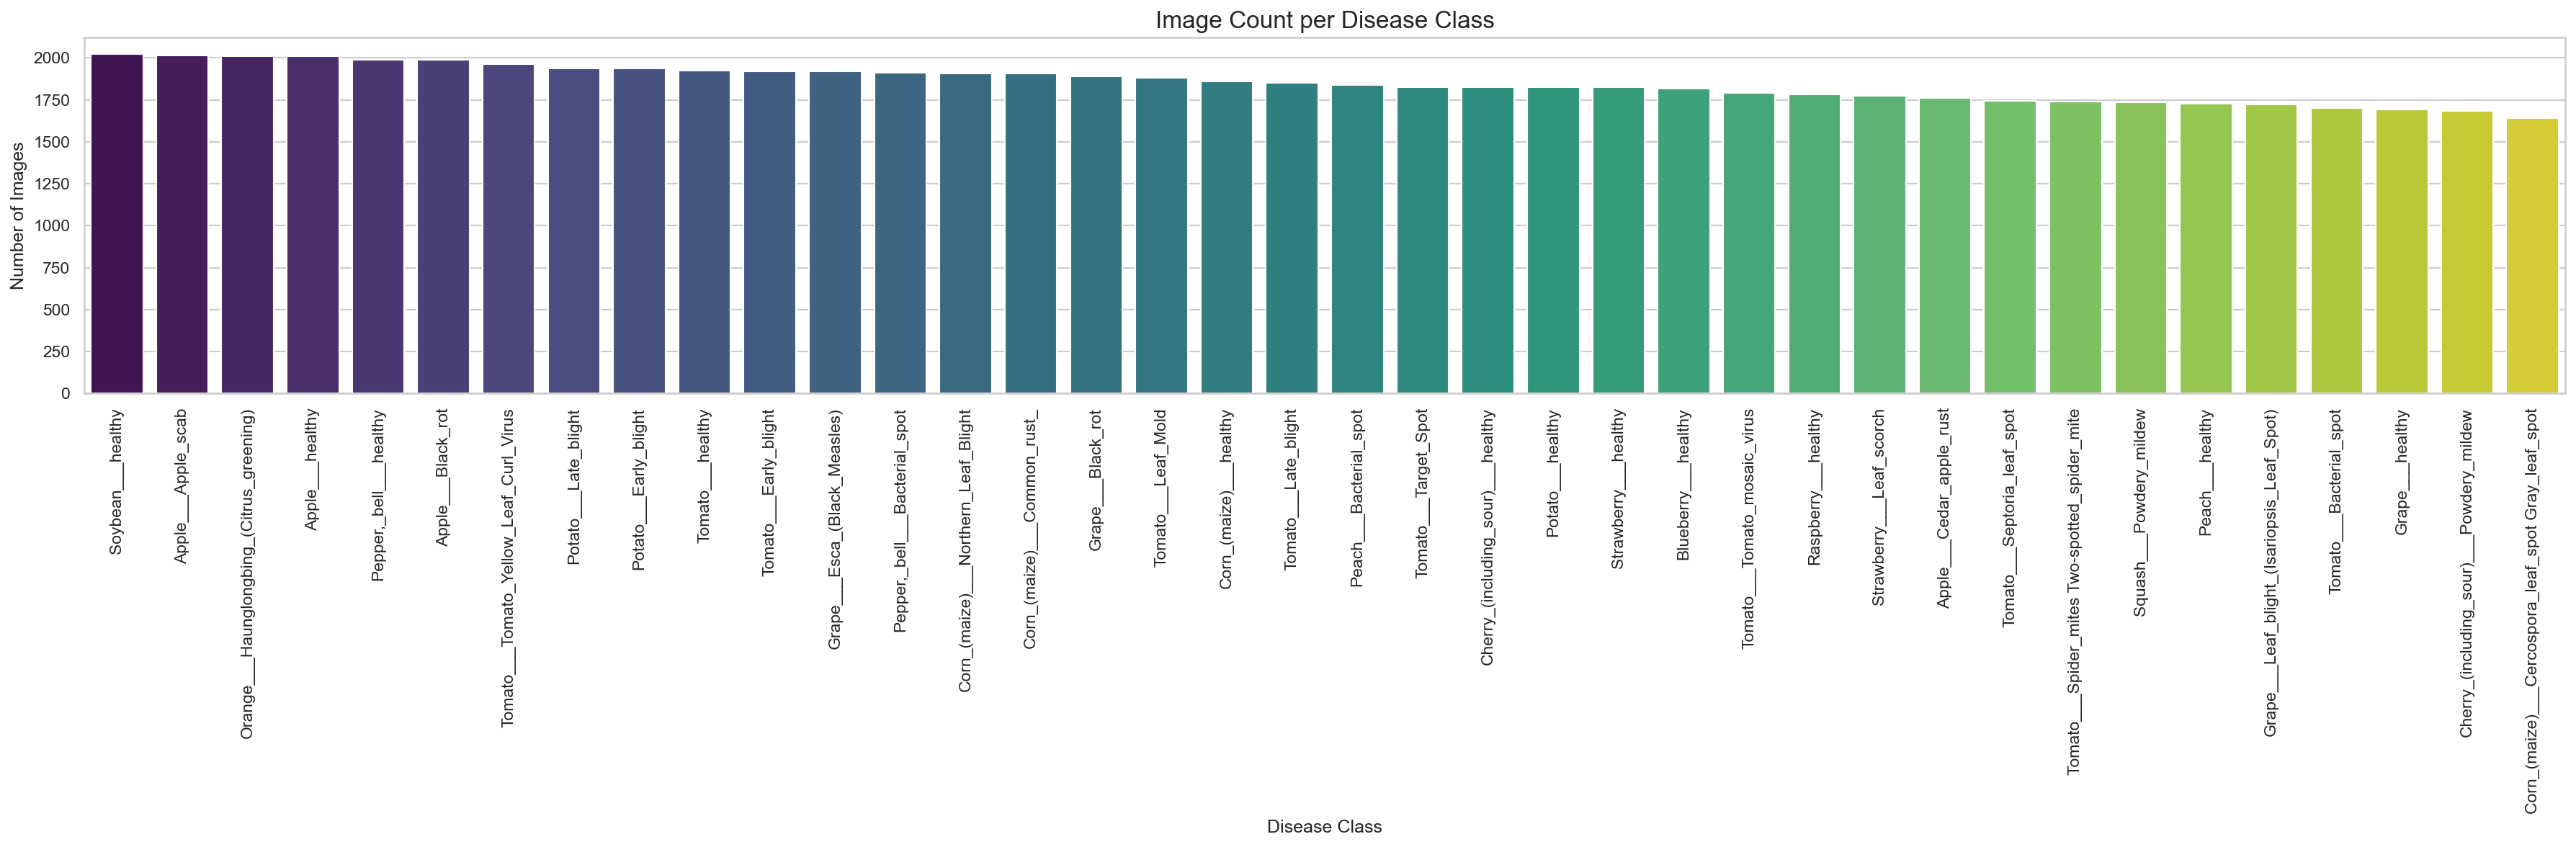

In [44]:
# Visualization 1: Number of Images per Disease Class
plt.figure(figsize=(24, 8), dpi=150)
sns.barplot(data=image_count, x='Disease_Class', y='No_of_Images', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Disease Class')
plt.ylabel('Number of Images')
plt.title('Image Count per Disease Class', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\vbhar\AppData\Local\Temp\ipykernel_14272\766282732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plant_img_count.index, y=plant_img_count.values, palette='crest')


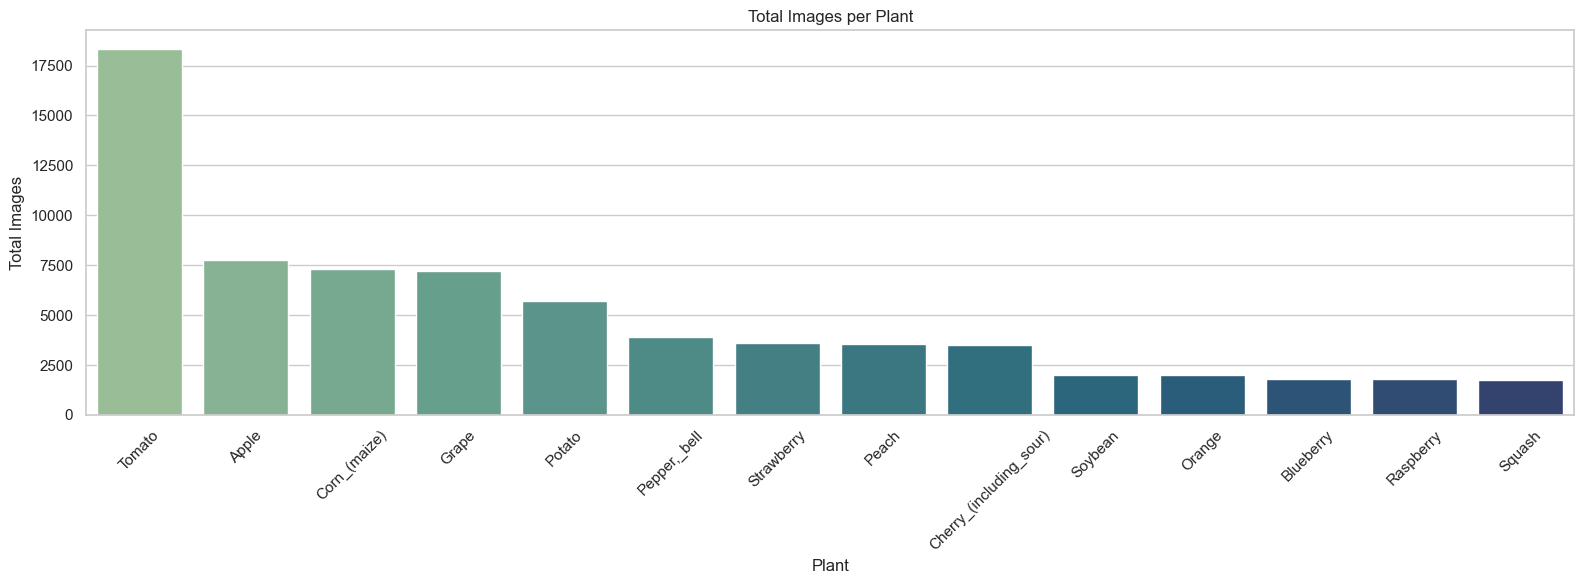

In [45]:
# Visualization 2: Total Images per Plant
plant_img_count = image_count.groupby('Plant')['No_of_Images'].sum().sort_values(ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(x=plant_img_count.index, y=plant_img_count.values, palette='crest')
plt.xticks(rotation=45)
plt.xlabel('Plant')
plt.ylabel('Total Images')
plt.title('Total Images per Plant')
plt.tight_layout()
plt.show()

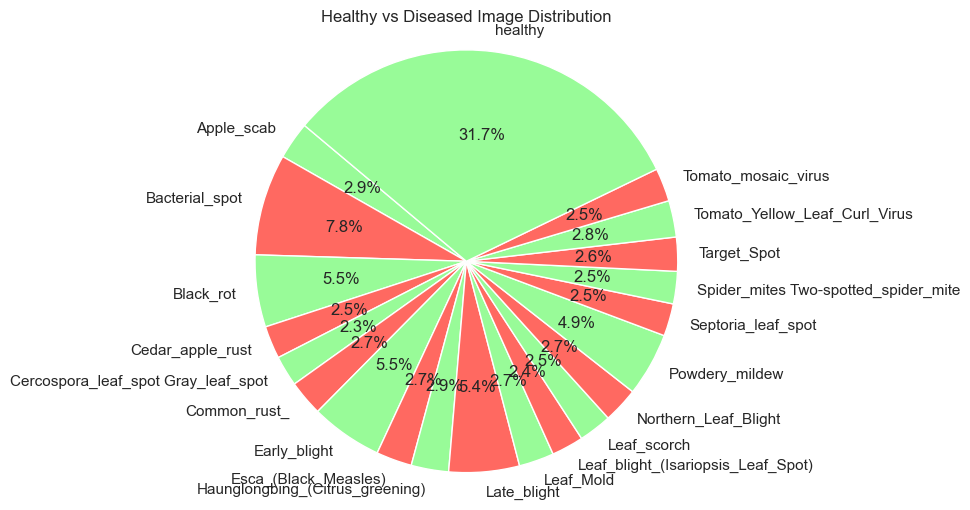

In [46]:
# Visualization 3: Healthy vs Diseased Distribution
health_status = image_count.groupby('Status')['No_of_Images'].sum()
plt.figure(figsize=(6, 6))
plt.pie(health_status, labels=health_status.index, autopct='%1.1f%%', colors=['#98FB98', '#FF6961'], startangle=140)
plt.title('Healthy vs Diseased Image Distribution')
plt.axis('equal')
plt.show()

C:\Users\vbhar\AppData\Local\Temp\ipykernel_14272\2655345132.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_per_plant.index, y=disease_per_plant.values, palette='flare')


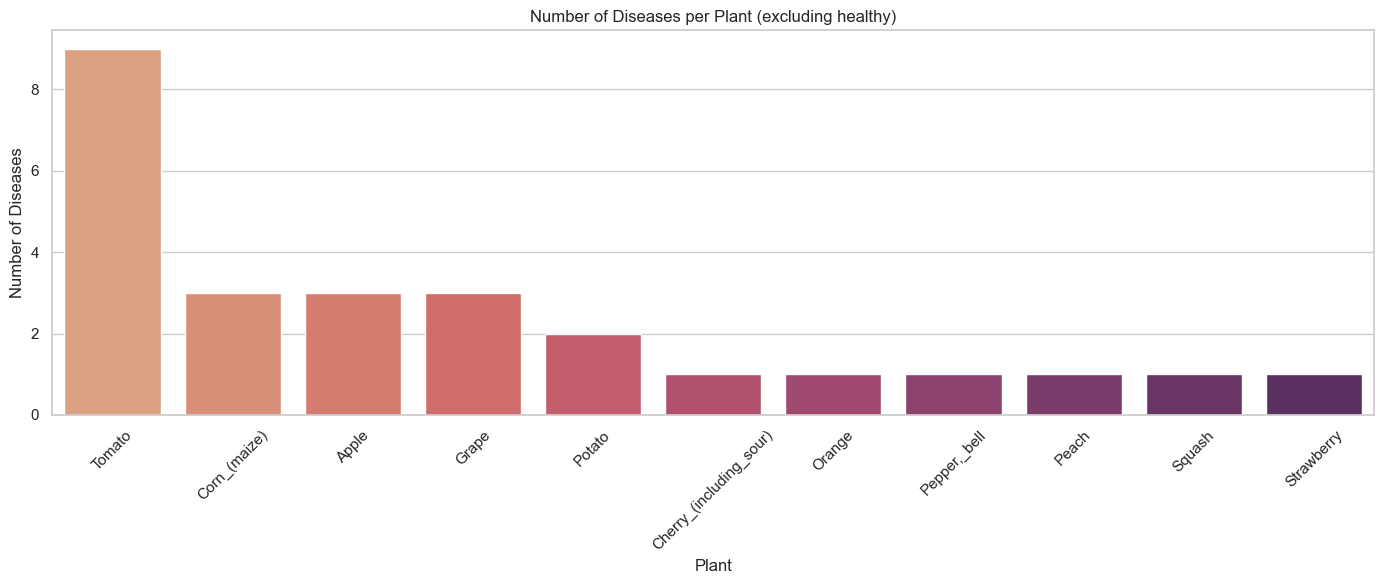

In [47]:
# Visualization 4: Number of Diseases per Plant
disease_per_plant = image_count[image_count['Status'] != 'healthy'].groupby('Plant').size().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=disease_per_plant.index, y=disease_per_plant.values, palette='flare')
plt.xticks(rotation=45)
plt.ylabel('Number of Diseases')
plt.xlabel('Plant')
plt.title('Number of Diseases per Plant (excluding healthy)')
plt.tight_layout()
plt.show()

C:\Users\vbhar\AppData\Local\Temp\ipykernel_14272\402028004.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_classes, x='No_of_Images', y='Disease_Class', palette='Greens_r', ax=axes[0])
C:\Users\vbhar\AppData\Local\Temp\ipykernel_14272\402028004.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_classes, x='No_of_Images', y='Disease_Class', palette='Reds_r', ax=axes[1])


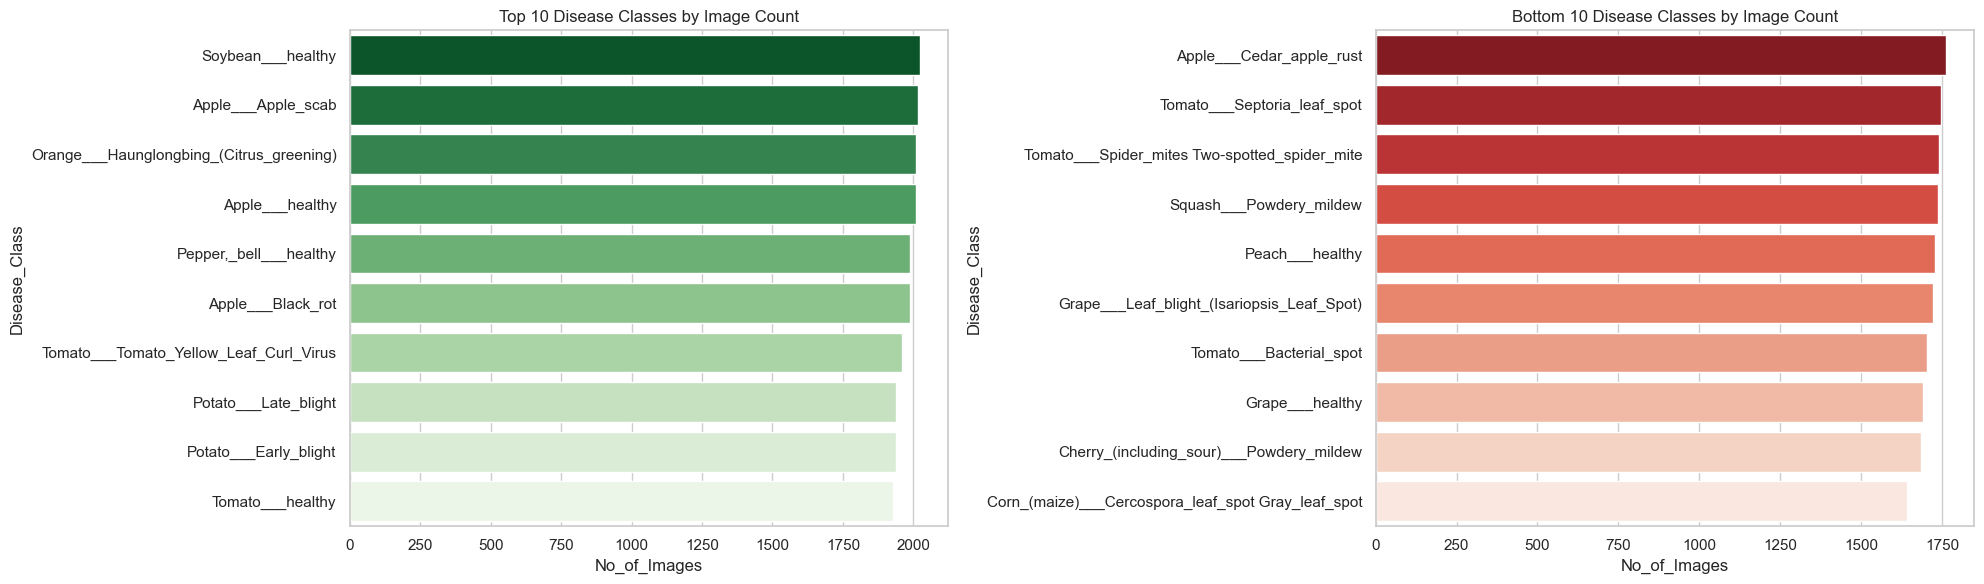

In [48]:
# Visualization 5: Top and Bottom 10 Classes by Image Count
top_classes = image_count.head(10)
bottom_classes = image_count.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 6), dpi=100)
sns.barplot(data=top_classes, x='No_of_Images', y='Disease_Class', palette='Greens_r', ax=axes[0])
axes[0].set_title('Top 10 Disease Classes by Image Count')
sns.barplot(data=bottom_classes, x='No_of_Images', y='Disease_Class', palette='Reds_r', ax=axes[1])
axes[1].set_title('Bottom 10 Disease Classes by Image Count')
plt.tight_layout()
plt.show()

In [49]:
# Table: Summary Stats per Plant
summary_table = image_count.groupby('Plant').agg(
    Total_Images=('No_of_Images', 'sum'),
    Disease_Types=('Status', lambda x: (x != 'healthy').sum()),
    Healthy_Count=('Status', lambda x: (x == 'healthy').sum())
).sort_values(by='Total_Images', ascending=False)
print("\nSummary Table per Plant:\n")
print(summary_table)


Summary Table per Plant:

                         Total_Images  Disease_Types  Healthy_Count
Plant                                                              
Tomato                          18345              9              1
Apple                            7771              3              1
Corn_(maize)                     7316              3              1
Grape                            7222              3              1
Potato                           5702              2              1
Pepper,_bell                     3901              1              1
Strawberry                       3598              1              1
Peach                            3566              1              1
Cherry_(including_sour)          3509              1              1
Soybean                          2022              0              1
Orange                           2010              1              0
Blueberry                        1816              0              1
Raspberry            

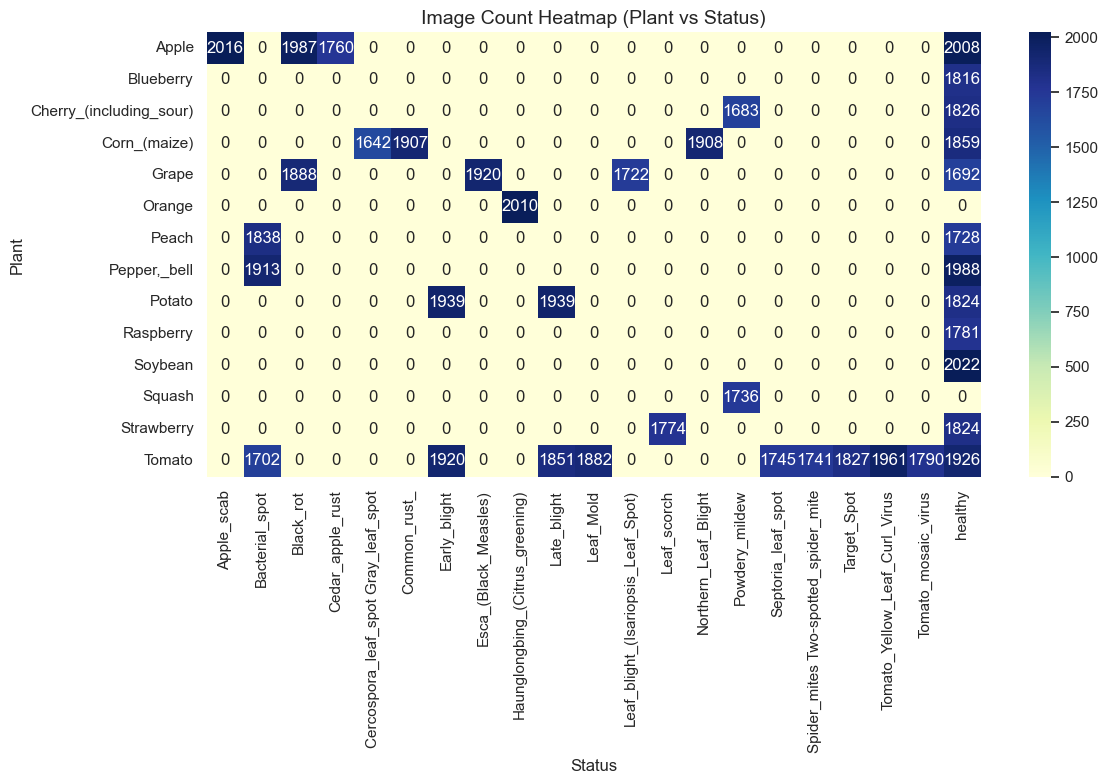

In [50]:
# Heatmap of Image Distribution
heatmap_data = image_count.pivot_table(values='No_of_Images', index='Plant', columns='Status', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.astype(int), annot=True, fmt='d', cmap='YlGnBu')

plt.title('Image Count Heatmap (Plant vs Status)', fontsize=14)
plt.ylabel('Plant')
plt.xlabel('Status')
plt.tight_layout()
plt.show()

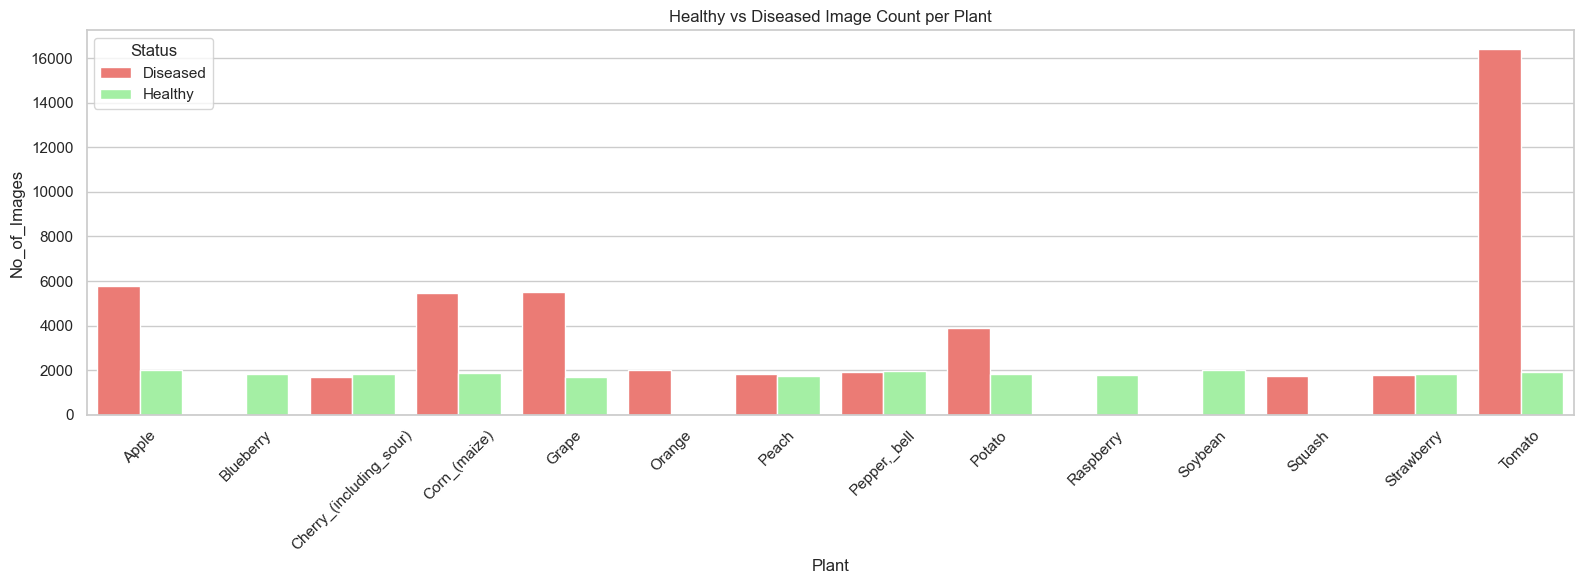

In [51]:
# Healthy vs Diseased per Plant
status_per_plant = image_count.copy()
status_per_plant['Status'] = status_per_plant['Status'].apply(lambda x: 'Diseased' if x != 'healthy' else 'Healthy')
status_grouped = status_per_plant.groupby(['Plant', 'Status'])['No_of_Images'].sum().reset_index()

plt.figure(figsize=(16, 6))
sns.barplot(data=status_grouped, x='Plant', y='No_of_Images', hue='Status', palette=['#FF6961', '#98FB98'])
plt.xticks(rotation=45)
plt.title('Healthy vs Diseased Image Count per Plant')
plt.tight_layout()
plt.show()

### 🔢 Distribution of Image Counts per Disease Class

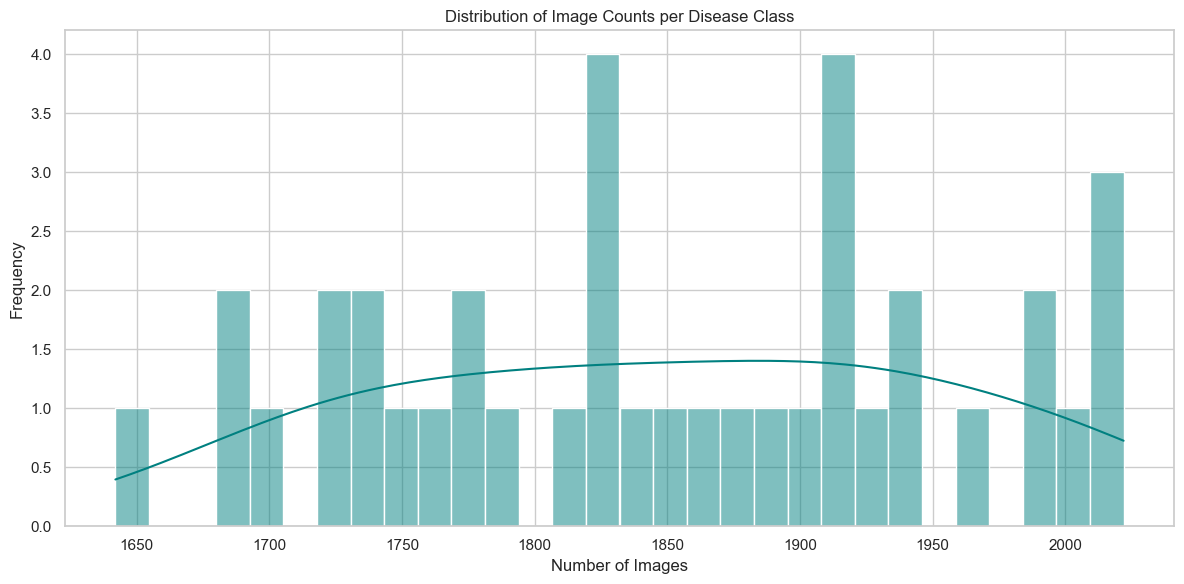

In [52]:

plt.figure(figsize=(12, 6))
sns.histplot(image_count['No_of_Images'], bins=30, kde=True, color='teal')
plt.title('Distribution of Image Counts per Disease Class')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### 🧮 Diseased to Healthy Ratio per Plant

C:\Users\vbhar\AppData\Local\Temp\ipykernel_14272\1199356691.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  plant_health_ratio['Diseased_to_Healthy'] = plant_health_ratio.apply(lambda row: row.sum() / row.get('healthy', 1), axis=1)
C:\Users\vbhar\AppData\Local\Temp\ipykernel_14272\1199356691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plant_health_ratio.index, y=plant_health_ratio['Diseased_to_Healthy'], palette='coolwarm')


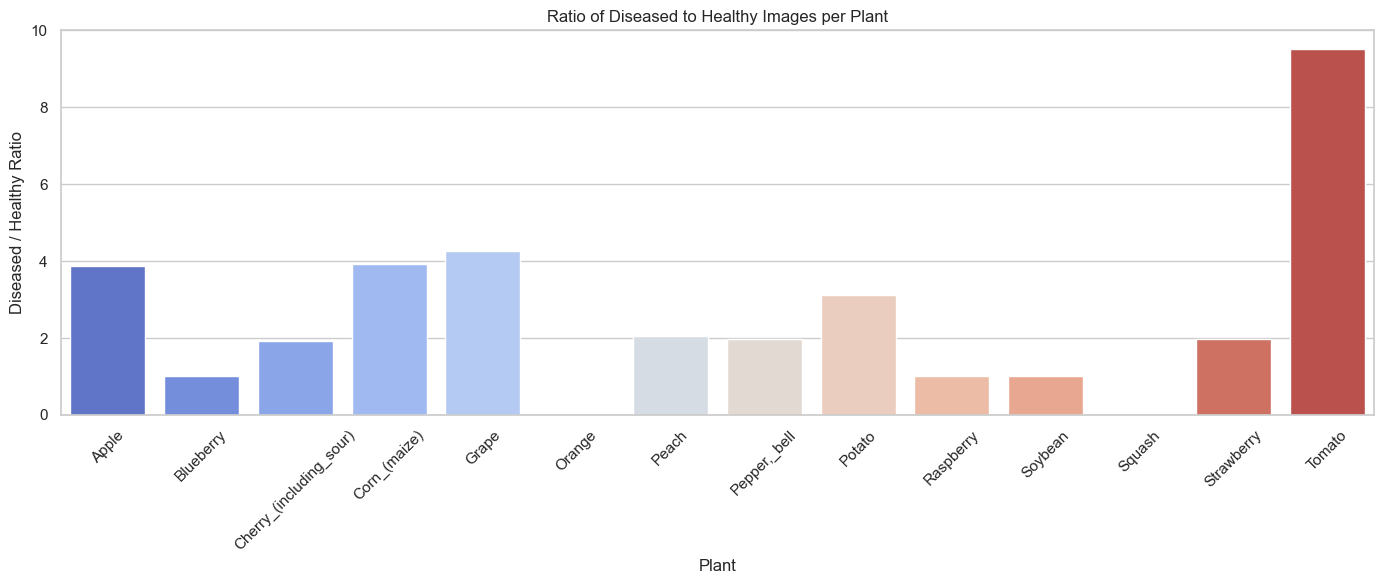

In [53]:

plant_health_ratio = image_count.pivot_table(index='Plant', columns='Status', values='No_of_Images', aggfunc='sum', fill_value=0)
plant_health_ratio['Diseased_to_Healthy'] = plant_health_ratio.apply(lambda row: row.sum() / row.get('healthy', 1), axis=1)

plt.figure(figsize=(14, 6))
sns.barplot(x=plant_health_ratio.index, y=plant_health_ratio['Diseased_to_Healthy'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Ratio of Diseased to Healthy Images per Plant')
plt.ylabel('Diseased / Healthy Ratio')
plt.tight_layout()
plt.show()


### 🌳 Treemap of Image Count per Disease Class

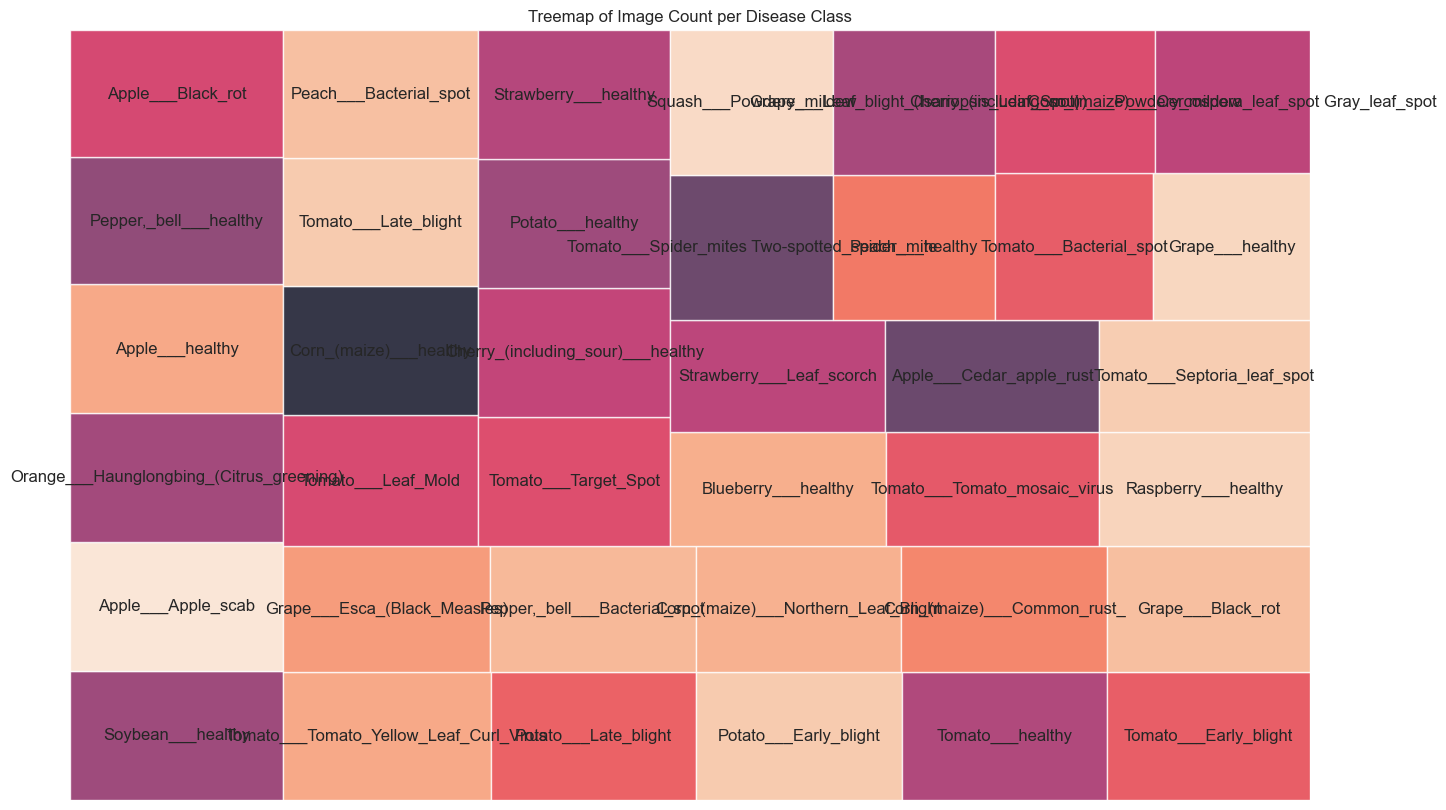

In [54]:

import squarify

plt.figure(figsize=(16, 10))
squarify.plot(sizes=image_count['No_of_Images'], label=image_count['Disease_Class'], alpha=.8)
plt.axis('off')
plt.title('Treemap of Image Count per Disease Class')
plt.show()


### 📋 Top 5 and Bottom 5 Disease Classes by Image Count

In [55]:

print("Top 5 Classes:\n", image_count.head(5)[['Disease_Class', 'No_of_Images']])
print("\nBottom 5 Classes:\n", image_count.tail(5)[['Disease_Class', 'No_of_Images']])


Top 5 Classes:
                               Disease_Class  No_of_Images
0                         Soybean___healthy          2022
1                        Apple___Apple_scab          2016
2  Orange___Haunglongbing_(Citrus_greening)          2010
3                           Apple___healthy          2008
4                    Pepper,_bell___healthy          1988

Bottom 5 Classes:
                                         Disease_Class  No_of_Images
33         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)          1722
34                            Tomato___Bacterial_spot          1702
35                                    Grape___healthy          1692
36           Cherry_(including_sour)___Powdery_mildew          1683
37  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...          1642


### 💾 Export Summary Tables

In [56]:

image_count.to_csv("class_distribution.csv", index=False)
plant_health_ratio.to_csv("summary_per_plant.csv")
print("CSV files exported successfully!")


CSV files exported successfully!



### 🔎 Key Insights

- Certain plants like Tomato and Apple show a wider variety of diseases.
- Class imbalance is noticeable — consider balancing strategies.
- Healthy images are fewer compared to diseased ones.
- A few classes are underrepresented and may need augmentation.

